In [42]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/arimorcos/Github/getRedditDataset/')
from celebReddit import countMisspellings, countWords
import redditDB
import datetime
from matplotlib import pyplot as pp
import numpy as np
import pandas as PD
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
"""
Get word count for each day in list
"""
minDate = '140401000000'
maxDate = '150319235959'

# convert to date objects
minDateObj = datetime.datetime(2000 + int(minDate[0:2]), int(minDate[2:4]), int(minDate[4:6]),
                               int(minDate[6:8]), int(minDate[8:10]), int(minDate[10:12]))
maxDateObj = datetime.datetime(2000 + int(maxDate[0:2]), int(maxDate[2:4]), int(maxDate[4:6]), 
                               int(maxDate[6:8]), int(maxDate[8:10]), int(maxDate[10:12])) 
                               
# get nDays
nDays = (maxDateObj - minDateObj).days

# initialize database
defaultDB = redditDB.RedditDB('oneYearDefaults')

# get subreddit list
subList = defaultDB.getSubreddits()

# loop through each subreddit
nPosts = {}
for sub in subList:

    # loop through each day 
    nPosts[sub] = []
    date = []
    for day in range(nDays):
        startDate = (minDateObj + datetime.timedelta(days=day)).strftime('%Y%m%d%H%M%S')
        endDate = (minDateObj + datetime.timedelta(days=(day + 1))).strftime('%Y%m%d%H%M%S')
        date.append(startDate)
        
        # get nPosts
        nPosts[sub].append(defaultDB.getNPosts(sub, startDate, endDate))
    

In [144]:
""" Smooth posts """

def smoothList(tempList, span=10):
    smooth = PD.Series(tempList)
    smooth = PD.rolling_mean(smooth, span)
    return list(smooth)

smoothPosts = {}
for sub in normPosts:
    smoothPosts[sub] = smoothList(normPosts[sub], 10)

In [95]:
""" Convert to date format for plots """
origDate = datetime.date(1,1,1)
dayDate = []
for day in range(len(date)):
    date[day] = (datetime.date(int(date[day][0:4]), int(date[day][4:6]), int(date[day][6:8])) - origDate).days

In [102]:
""" Normalize posts """
normPosts = {}
for sub in nPosts:
    meanPost = statistics.mean(nPosts[sub][0:30])
    normPosts[sub] = [float(postNum)/meanPost for postNum in nPosts[sub]]

In [130]:
""" Mean of all subs """
meanSub = []
for day in range(len(date)):
    meanSub.append(statistics.mean([normPosts[sub][day] for sub in subList]))

crossDate = datetime.date(2014, 5, 7)
crossDate = (crossDate - datetime.date(1,1,1)).days
#crossDate = date.index(crossDate)

[None, None, None, None, None, None, None, None, None, None, None]

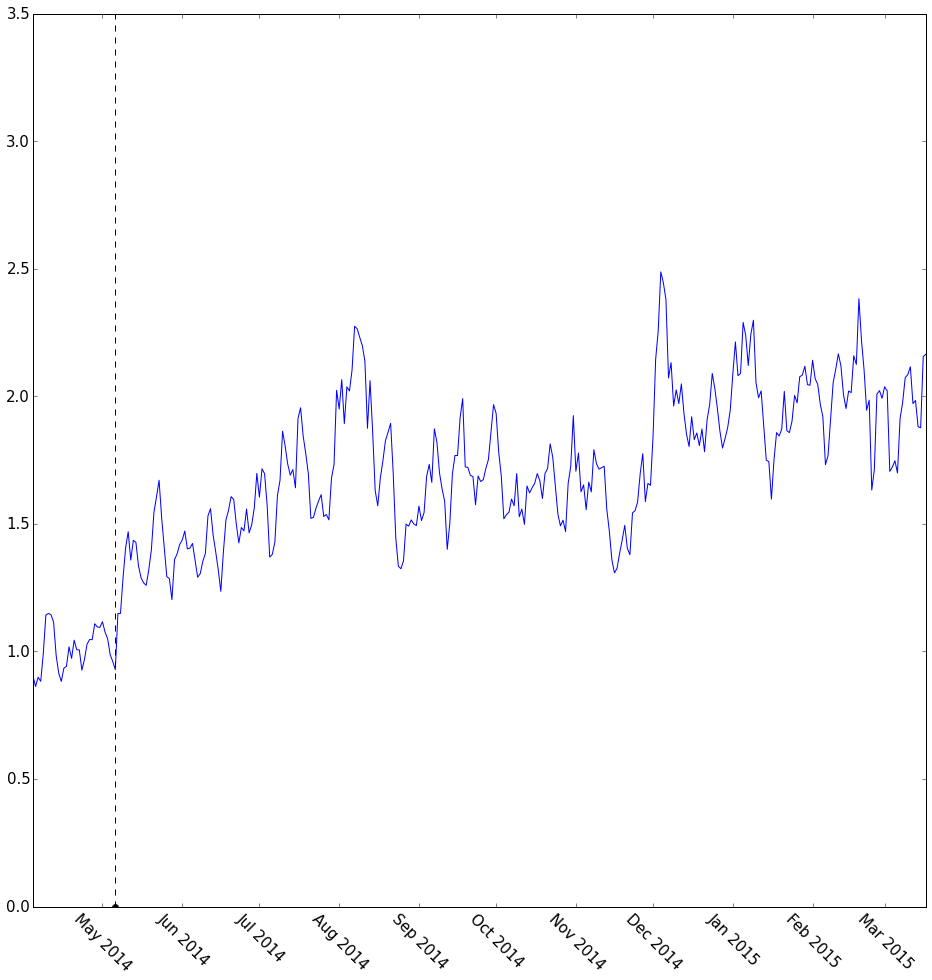

In [160]:
smoothMeanSub = smoothList(meanSub, 5)

pp.figure(figsize=(16,16))
pp.plot_date(date, smoothMeanSub, xdate=True, ydate=False, ls='-', marker=None)
pp.plot_date([crossDate, crossDate], [0, 500], xdate=True, ydate=False, ls='--', color='k')
ax = pp.gca()
ax.set_ylim(0, 3.5)
ax.tick_params(labelsize=15)
locs, labels = pp.xticks()
pp.setp(labels, rotation=-45)

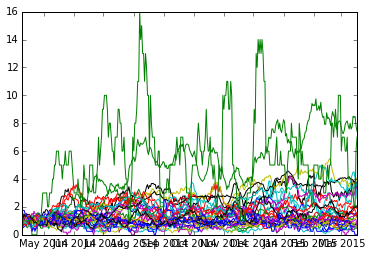

In [107]:
for sub in subList:
    hand = pp.plot_date(date,smoothPosts[sub], xdate=True, ydate=False, ls='-', marker=None)